In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset_main=pd.read_csv('https://raw.githubusercontent.com/Toshika-Kamble/Astro_project/main/hwc.csv')

In [8]:
dataset_main

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00000,-120.00000,413.00000,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60000,-3.60000,4.40000,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10000,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20000,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94000,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,-82.63539,111.23994,0,Mass,...,1.893917,0.541322,0,0,Cold,0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,-3.80000,4.00000,0,Mass,...,2.520276,0.543834,0,0,Hot,0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,-1.40000,1.40000,0,Mass,...,1.249824,0.400198,0,0,Hot,0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,-0.45000,0.45000,0,Msini,...,0.787469,0.475336,0,0,Hot,0,0.272975,Pisces,Psc,Fishes


In [33]:
dataset_main=dataset_main.dropna(subset=["P_ESI"])
print(dataset_main)

            P_NAME      P_DETECTION  \
1     Kepler-276 c          Transit   
2     Kepler-829 b          Transit   
3         K2-283 b          Transit   
4     Kepler-477 b          Transit   
5       TOI-1260 c          Transit   
...            ...              ...   
5592    TOI-1694 b          Transit   
5594   HD 222155 b  Radial Velocity   
5595    HD 88986 b  Radial Velocity   
5596   Kepler-30 b          Transit   
5597     HD 3167 d  Radial Velocity   

                              P_DISCOVERY_FACILITY  P_YEAR    P_UPDATE  \
1                                           Kepler    2013  2018-09-25   
2                                           Kepler    2016  2019-04-16   
3                                               K2    2018  2019-09-05   
4                                           Kepler    2016  2019-04-16   
5     Transiting Exoplanet Survey Satellite (TESS)    2021  2022-12-17   
...                                            ...     ...         ...   
5592  Transit

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [34]:
x=dataset_main.loc[:, ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_INCLINATION',
'P_TEMP_SURF', 'P_TEMP_EQUIL', 'P_GRAVITY', 'P_DENSITY', 'S_TEMPERATURE', 'S_LUMINOSITY',
'S_RADIUS', 'S_MASS', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX']]
y=dataset_main.loc[:,'P_ESI']

In [36]:
regressor_model=RandomForestRegressor(n_estimators=10)
regressor_model.fit(x,y)


RandomForestRegressor(n_estimators=10)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
predictions=regressor_model.predict(x)
mean_sq_err=mean_squared_error(y,predictions)
r2=r2_score(y,predictions)
print("r2 score=", r2)
print("mean squared error=", mean_sq_err)


r2 score= 0.999156992093535
mean squared error= 1.4601743878248895e-05


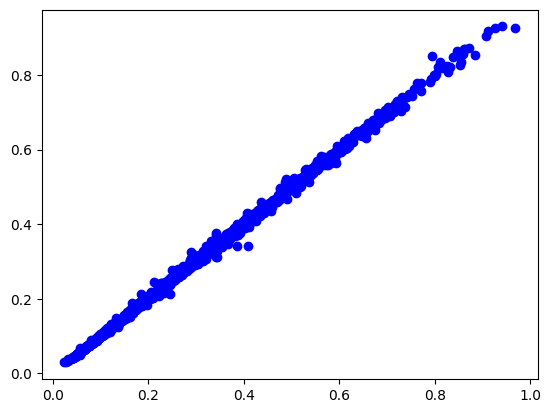

In [51]:
plt.scatter(y,predictions, color="blue")

In [57]:
#for kepler
kepler_data=pd.read_csv("https://raw.githubusercontent.com/Toshika-Kamble/kepler_data/main/cumulative_2024.07.11_03.50.10.csv")

In [58]:
kepler_data

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,S_RADIUS,koi_srad_err1,koi_srad_err2,P_INCLINATION,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [67]:
#mean data types that i want
pmass=dataset_main.P_MASS.mean()
kepler_data['P_MASS']= pmass

smass=dataset_main.S_MASS.mean()
kepler_data['S_MASS']= smass

psemimajor=dataset_main.P_SEMI_MAJOR_AXIS.mean()
kepler_data['P_SEMI_MAJOR_AXIS']= psemimajor

pecc=dataset_main.P_ECCENTRICITY.mean()
kepler_data['P_ECCENTRICITY']= pecc

ptempsurf=dataset_main.P_TEMP_SURF.mean()
kepler_data['P_TEMP_SURF']= ptempsurf

pgrav=dataset_main.P_GRAVITY.mean()
kepler_data['P_GRAVITY']= pgrav

pden=dataset_main.P_DENSITY.mean()
kepler_data['P_DENSITY']= pden

slum=dataset_main.S_LUMINOSITY.mean()
kepler_data['S_LUMINOSITY']= slum

soptmin=dataset_main.S_HZ_OPT_MIN.mean()
kepler_data['S_HZ_OPT_MIN']= soptmin

soptmax=dataset_main.S_HZ_OPT_MAX.mean()
kepler_data['S_HZ_OPT_MAX']= soptmax

sconmin=dataset_main.S_HZ_CON_MIN.mean()
kepler_data['S_HZ_CON_MIN']= soptmin

sconmax=dataset_main.S_HZ_CON_MAX.mean()
kepler_data['S_HZ_CON_MAX']= sconmax

In [68]:

x1=kepler_data.loc[:, ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_INCLINATION',
'P_TEMP_SURF', 'P_TEMP_EQUIL', 'P_GRAVITY', 'P_DENSITY', 'S_TEMPERATURE', 'S_LUMINOSITY',
'S_RADIUS', 'S_MASS', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX']]


In [87]:
predictions1=regressor_model.predict(x1)
print(predictions1)

[0.25433775 0.33220453 0.08988982 ... 0.29844704 0.10157469 0.29844704]


In [96]:
kepler_data['P_ESI']=predictions1
kepler_data=kepler_data.sort_values(by="P_ESI", ascending=False)

In [100]:
kepler_data.iloc[0:10,:]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,P_ECCENTRICITY,P_TEMP_SURF,P_GRAVITY,P_DENSITY,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,P_ESI
7830,4069213,K06382.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.607349
2488,7019524,K02877.01,Kepler-1376 b,CONFIRMED,CANDIDATE,0.981,0,0,0,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.607349
5736,7281668,K07829.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
6183,6543674,K05298.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,1,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
5948,7021534,K02267.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
887,3858704,K01211.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.001,0,0,1,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
944,6631721,K00160.01,NaN,FALSE POSITIVE,FALSE POSITIVE,1.000,0,0,1,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
6826,9845931,K05721.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.130,0,0,1,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
73,3342970,K00800.01,Kepler-234 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903
2374,8292840,K00260.03,Kepler-126 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,0.07615,971.994023,3.862434,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,0.604903


In [72]:
#FOR TESS DATA
tess_data=pd.read_csv("https://raw.githubusercontent.com/Toshika-Kamble/Tess_data/main/PS_2024.07.11_03.57.47.csv")
tess_data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,AU Mic b,AU Mic,1,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,09-05-2022,2021-12,09-05-2022
1,AU Mic c,AU Mic,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,09-05-2022,2021-12,09-05-2022
2,BD-14 3065 b,BD-14 3065 A,1,3,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.013,9.932,0.026,-0.026,10.91000,0.001617,-0.001617,25-06-2024,2024-03,25-06-2024
3,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.030,6.676,0.034,-0.034,8.31926,0.001025,-0.001025,03-07-2019,2019-07,11-07-2019
4,GJ 1252 b,GJ 1252,1,1,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.200,7.915,0.023,-0.023,11.23640,0.000806,-0.000806,10-07-2023,2022-09,10-07-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,WASP-18 c,WASP-18,1,2,2,Transit Timing Variations,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,1,...,-0.030,8.131,0.027,-0.027,9.16617,0.000236,-0.000236,02-12-2019,2019-12,05-12-2019
478,WASP-84 c,WASP-84,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.011,8.855,0.023,-0.023,10.57450,0.000590,-0.000590,10-07-2023,2023-06,10-07-2023
479,WD 1856+534 b,WD 1856+534,1,3,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.046,15.548,0.186,-0.186,16.95800,0.000967,-0.000967,10-12-2020,2020-09,17-12-2020
480,Wolf 327 b,Wolf 327,1,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.062,8.435,0.017,-0.017,11.95220,0.000646,-0.000646,05-02-2024,2024-01,05-02-2024


In [79]:
ptempsurf=dataset_main.P_TEMP_SURF.mean()
tess_data['P_TEMP_SURF']= ptempsurf

pgrav=dataset_main.P_GRAVITY.mean()
tess_data['P_GRAVITY']= pgrav

pden=dataset_main.P_DENSITY.mean()
tess_data['P_DENSITY']= pden

slum=dataset_main.S_LUMINOSITY.mean()
tess_data['S_LUMINOSITY']= slum

soptmin=dataset_main.S_HZ_OPT_MIN.mean()
tess_data['S_HZ_OPT_MIN']= soptmin

soptmax=dataset_main.S_HZ_OPT_MAX.mean()
tess_data['S_HZ_OPT_MAX']= soptmax

sconmin=dataset_main.S_HZ_CON_MIN.mean()
tess_data['S_HZ_CON_MIN']= soptmin

sconmax=dataset_main.S_HZ_CON_MAX.mean()
tess_data['S_HZ_CON_MAX']= sconmax

In [83]:

x2=tess_data.loc[:, ['P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_INCLINATION',
'P_TEMP_SURF', 'P_TEMP_EQUIL', 'P_GRAVITY', 'P_DENSITY', 'S_TEMPERATURE', 'S_LUMINOSITY',
'S_RADIUS', 'S_MASS', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX']]
#p tem p surf, p density, s luminous S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX'

In [85]:
predictions2=regressor_model.predict(x2)
print(predictions2)

[0.28874268 0.28881381 0.04384341 0.14576653 0.29848079 0.37908167
 0.26434897 0.29772475 0.35491392 0.29468516 0.32985027 0.29558381
 0.58075286 0.28022504 0.25828565 0.24095986 0.21335435 0.22127164
 0.23685345 0.20661799 0.25836225 0.07819452 0.19825541 0.14670229
 0.28118501 0.25847087 0.26166466 0.2735126  0.20448021 0.23626893
 0.20178193 0.24351758 0.27544047 0.05349495 0.27334519 0.25726213
 0.26133884 0.2721692  0.30069504 0.18021758 0.09901293 0.2850518
 0.29660087 0.34564774 0.29723234 0.29906497 0.30686538 0.2621842
 0.2976845  0.32445417 0.05704547 0.25414446 0.21271278 0.27538962
 0.09934742 0.24208592 0.1883815  0.25676144 0.24124744 0.2990289
 0.21818022 0.23847377 0.31134019 0.2311272  0.2532772  0.29375557
 0.20347927 0.27774208 0.27876825 0.20593033 0.04263213 0.08915703
 0.21318215 0.20627171 0.28714205 0.23839524 0.25654369 0.26480546
 0.25352798 0.29224634 0.30706977 0.33031351 0.37364667 0.30812702
 0.29507181 0.29920741 0.29940523 0.29942368 0.29887234 0.3084914

In [98]:
tess_data['P_ESI']=predictions2
tess_data=tess_data.sort_values(by="P_ESI", ascending=False)

In [101]:
tess_data.iloc[0:10,:]

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,releasedate,P_TEMP_SURF,P_DENSITY,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,P_GRAVITY,P_ESI
270,TOI-2257 b,TOI-2257,1,1,1,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,09-11-2021,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.657719
442,TOI-715 b,TOI-715,1,1,1,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,26-05-2023,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.653114
466,TOI-904 c,TOI-904,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,04-03-2024,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.648116
246,TOI-2095 c,TOI-2095,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,22-08-2023,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.622879
359,TOI-4336 A b,TOI-4336 A,1,3,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,08-05-2024,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.583046
12,Gliese 12 b,Gliese 12,1,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,21-05-2024,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.580753
273,TOI-2285 b,TOI-2285,1,1,1,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,25-10-2021,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.576918
441,TOI-712 d,TOI-712,1,1,3,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,29-08-2022,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.567534
92,LP 791-18 c,LP 791-18,1,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,14-05-2023,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.550770
174,TOI-1452 b,TOI-1452,1,2,1,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,30-08-2022,971.994023,1.167578,8.002568,1.01271,2.424301,1.01271,2.298454,3.862434,0.543333
